# Modeling the demand and water supplies for the 5 watersheds

### Demand side: 

Use the billing data to determine the volume of water provided

### Supply side:

- Water produced from supplier’s sources
- Water purchased from other suppliers
- Non-revenue water (e.g. leaks, theft, water used to fight fires)
- Commercial agriculture

(Not including produced but stored water)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df_LAdemand = pd.read_excel('~/Downloads/Resevoir_data.xlsx', sheet_name=2)

In [3]:
df_LAdemand.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)
df_LAdemand['Date'] = pd.to_datetime(df_LAdemand['Date'])
df_LAdemand.set_index('Date', inplace = True, drop = True)

In [4]:
df_LAdemand

,Population served,Systemwide per-capita usage,Residential per-capita usage
Date,,,
2018-01-01,4083110,100,62
2018-02-01,4117401,105,69
2018-03-01,4120870,87,59
2018-04-01,4124338,105,60
2018-05-01,4085000,109,63
2018-06-01,4085000,118,71
2018-07-01,4085000,131,73
2018-08-01,4099384,130,78
2018-09-01,4101439,123,80


In [5]:
from statsmodels.tsa.arima.model import ARIMA

Text(0, 0.5, 'gpcd')

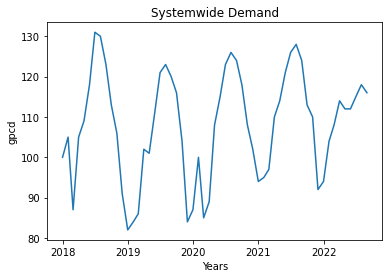

In [6]:
systemwide = df_LAdemand['Systemwide per-capita usage']
plt.plot(systemwide)
plt.title("Systemwide Demand")
plt.xlabel("Years")
plt.ylabel("gpcd")

In [7]:
model = ARIMA(systemwide, order=(4,1,0))
model_fitted = model.fit()
print(model_fitted.summary())

/Users/macos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/macos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/macos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:     Systemwide per-capita usage   No. Observations:                   57
Model:                          ARIMA(4, 1, 0)   Log Likelihood                -197.327
Date:                         Thu, 04 May 2023   AIC                            404.654
Time:                                 22:12:32   BIC                            414.781
Sample:                             01-01-2018   HQIC                           408.581
                                  - 09-01-2022                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2273      0.118      1.918      0.055      -0.005       0.459
ar.L2          0.0498      0.117      0.425      0.671     

### Evaluation 

Text(0.5, 1.0, 'Residual plot')

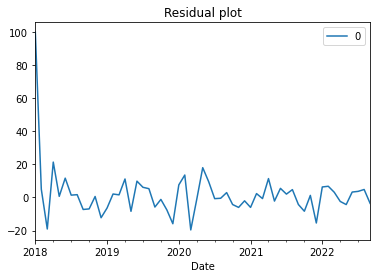

In [8]:
pd.DataFrame(model_fitted.resid).plot()
plt.title("Residual plot")

Looking at the residual plot, there are some information that are not captured by the model which could be noise.

,0
count,57.000000
mean,2.001977
std,15.595462
min,-19.627833
25%,-4.287941
50%,1.264330
75%,5.325475
max,100.000000


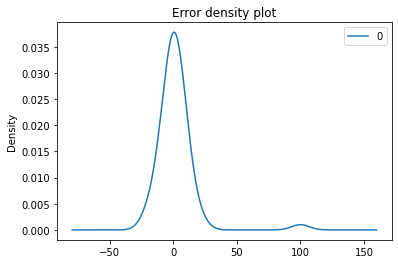

In [9]:
pd.DataFrame(model_fitted.resid).plot(kind = 'kde')
plt.title("Error density plot")
pd.DataFrame(model_fitted.resid).describe()

Based on the density plot, it looks like the errors follow a Gaussian distribution and the mean of residual is near 0 so it indicates good fit. 

### Forcasting

In [10]:
#Rolling cross validation

X = systemwide.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

print(history)
#Training 

for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

[100, 105, 87, 105, 109, 118, 131, 130, 123, 113, 106, 91, 82, 84, 86, 102, 101, 111, 121, 123, 120, 116, 104, 84, 87, 100, 85, 89, 108, 115, 123, 126, 124, 118, 108, 102, 94]
predicted=91.909618, expected=95.000000
predicted=97.585979, expected=97.000000
predicted=97.821361, expected=110.000000
predicted=116.384241, expected=114.000000
predicted=115.086941, expected=121.000000
predicted=124.513688, expected=126.000000
predicted=123.314920, expected=128.000000
predicted=128.609207, expected=124.000000
predicted=121.535662, expected=113.000000
predicted=108.619525, expected=110.000000
predicted=107.421364, expected=92.000000
predicted=86.860973, expected=94.000000
predicted=96.589911, expected=104.000000
predicted=104.337131, expected=108.000000
predicted=117.174226, expected=114.000000
predicted=116.392686, expected=112.000000
predicted=108.531085, expected=112.000000
predicted=111.226890, expected=115.000000
predicted=113.083290, expected=118.000000
predicted=119.590164, expected=116.

Test RMSE: 6.200


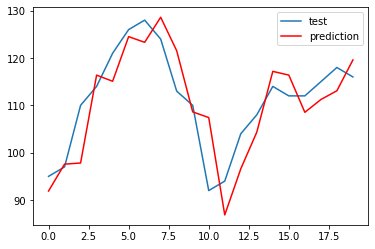

In [11]:
# Plotting test vs prediction

from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(labels = ['test', 'prediction'])
plt.show()

### Pretty good! Let's forecast the systemwide demand for 2024.

In [12]:
duration = pd.date_range(start = systemwide[[-1]].index[0], end = "2022-12-01", freq = 'MS')

In [13]:
X = systemwide.values
history = list(X[:])
pred_list = []

model = ARIMA(history, order = (4,1,0))
model_fit = model.fit()
pred = model_fit.forecast(13)
pred

array([116.13550416, 115.39192779, 113.82046519, 114.18985108,
       114.03595288, 114.0650178 , 114.7025153 , 114.68889056,
       114.7790256 , 114.881664  , 114.67044344, 114.64585717,
       114.61131568])

In [14]:
X = systemwide.values
history = list(X[:])
pred_list = []

for i in duration:
    model = ARIMA(history, order = (4,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast(10)
    pred_list.append(pred[0])
    history.append(pred[0])
    print(pred)

[116.13550416 115.39192779 113.82046519 114.18985108 114.03595288
 114.0650178  114.7025153  114.68889056 114.7790256  114.881664  ]
[115.39103906 113.81720167 114.18704646 114.03276735 114.06175959
 114.70112488 114.68748839 114.77793474 114.88109158 114.66896087]
[113.81508802 114.18547004 114.03097846 114.05964314 114.70071734
 114.68701961 114.77765455 114.88136911 114.66839061 114.64359567]
[114.18649042 114.03198167 114.06070257 114.70285409 114.68881179
 114.77952911 114.88352522 114.66982669 114.64504523 114.61024523]


<AxesSubplot:>

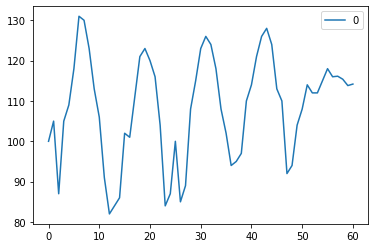

In [15]:
pd.DataFrame(history).plot()